<a href="https://colab.research.google.com/github/dwikagt/SKRIPSI_P2P_STACKINGGA/blob/main/FIXX_Uji_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library**

In [1]:
!pip install -q hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 2.4 MB/s eta 0:00:00


In [2]:
!pip install tensorflow==2.7.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.12.1, 2.13.0rc0, 2.13.0rc1, 2.13.0rc2, 2.13.0, 2.13.1, 2.14.0rc0, 2.14.0rc1, 2.14.0, 2.14.1, 2.15.0rc0, 2.15.0rc1, 2.15.0, 2.15.0.post1, 2.15.1, 2.16.0rc0, 2.16.1, 2.17.0rc0)
ERROR: No matching distribution found for tensorflow==2.7.0


In [4]:
!pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [8]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 26.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.8.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import hvplot.pandas

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report,
    roc_auc_score, roc_curve, auc,
    plot_confusion_matrix, plot_roc_curve
)

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC

pd.set_option('display.float', '{:.2f}'.format)
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [3]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import RandomTreesEmbedding
#from sklearn.neighbors import BallTree
#from sklearn.neighbors import KDTree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier

# Data Collection

In [4]:
df = pd.read_csv('/content/loan_data.csv',  delimiter=',')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.12,829.10,11.35,19.48,737,5639.96,28854,52.10,0,0,0,0
1,1,credit_card,0.11,228.22,11.08,14.29,707,2760.00,33623,76.70,0,0,0,0
2,1,debt_consolidation,0.14,366.86,10.37,11.63,682,4710.00,3511,25.60,1,0,0,0
3,1,debt_consolidation,0.10,162.34,11.35,8.10,712,2699.96,33667,73.20,1,0,0,0
4,1,credit_card,0.14,102.92,11.30,14.97,667,4066.00,4740,39.50,0,1,0,0


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.80,0.12,319.09,10.93,12.61,710.85,4560.77,16913.96,46.80,1.58,0.16,0.06,0.16
std,0.40,0.03,207.07,0.61,6.88,37.97,2496.93,33756.19,29.01,2.20,0.55,0.26,0.37
min,0.00,0.06,15.67,7.55,0.00,612.00,178.96,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.10,163.77,10.56,7.21,682.00,2820.00,3187.00,22.60,0.00,0.00,0.00,0.00
50%,1.00,0.12,268.95,10.93,12.66,707.00,4139.96,8596.00,46.30,1.00,0.00,0.00,0.00
75%,1.00,0.14,432.76,11.29,17.95,737.00,5730.00,18249.50,70.90,2.00,0.00,0.00,0.00
max,1.00,0.22,940.14,14.53,29.96,827.00,17639.96,1207359.00,119.00,33.00,13.00,5.00,1.00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# Exploratory Data Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


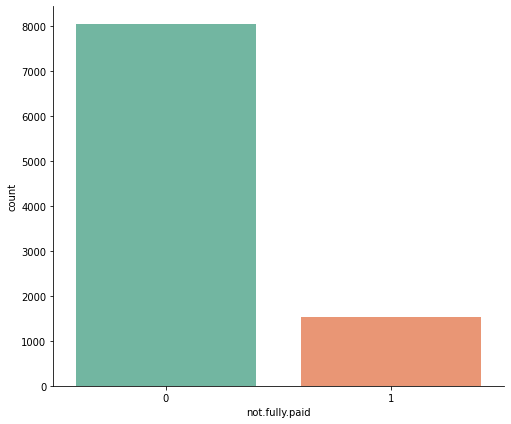

In [ ]:
sns.catplot(kind='count',x='not.fully.paid',height=6, aspect=1.2,data=df,palette='Set2')
plt.show()

In [ ]:
df["not.fully.paid"].value_counts(dropna= False)

0    8045
1    1533
Name: not.fully.paid, dtype: int64

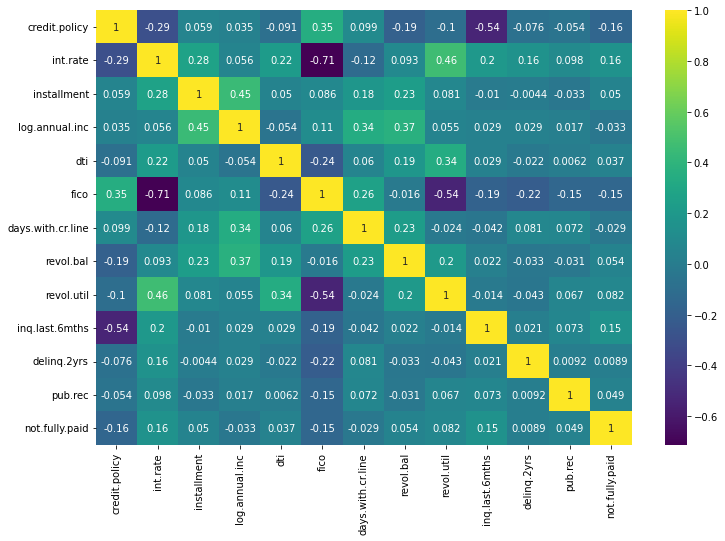

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

Installment memiliki korelasi baik dengan log.annual.inc; fico dengan credit policy; revol.util dan int.rate; logannual.inc dan revo.bal

In [ ]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00,9578.00
mean,0.80,0.12,319.09,10.93,12.61,710.85,4560.77,16913.96,46.80,1.58,0.16,0.06,0.16
std,0.40,0.03,207.07,0.61,6.88,37.97,2496.93,33756.19,29.01,2.20,0.55,0.26,0.37
min,0.00,0.06,15.67,7.55,0.00,612.00,178.96,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.10,163.77,10.56,7.21,682.00,2820.00,3187.00,22.60,0.00,0.00,0.00,0.00
50%,1.00,0.12,268.95,10.93,12.66,707.00,4139.96,8596.00,46.30,1.00,0.00,0.00,0.00
75%,1.00,0.14,432.76,11.29,17.95,737.00,5730.00,18249.50,70.90,2.00,0.00,0.00,0.00
max,1.00,0.22,940.14,14.53,29.96,827.00,17639.96,1207359.00,119.00,33.00,13.00,5.00,1.00


In [ ]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [ ]:
df['installment'].value_counts()

317.72    41
316.11    34
319.47    29
381.26    27
662.68    27
          ..
97.53      1
76.26      1
150.84     1
158.99     1
853.43     1
Name: installment, Length: 4788, dtype: int64

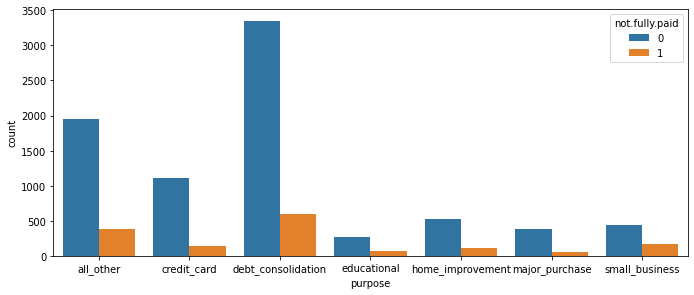

In [ ]:
plt.figure(figsize=(25, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.purpose.unique().tolist())
sns.countplot(x='purpose', data=df, hue='not.fully.paid', order=grade)

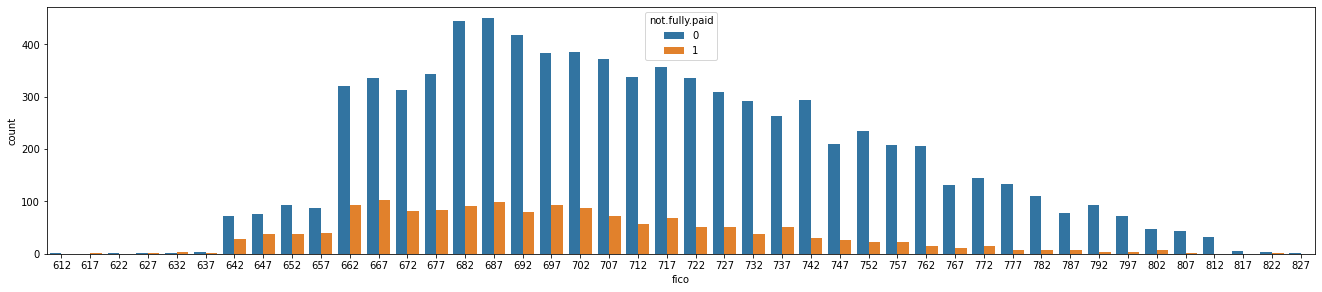

In [ ]:
plt.figure(figsize=(50, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.fico.unique().tolist())
sns.countplot(x='fico', data=df, hue='not.fully.paid', order=grade)

In [ ]:
df['fico'].value_counts()

687    548
682    536
692    498
697    476
702    472
707    444
667    438
677    427
717    424
662    414
712    395
672    395
722    388
727    361
732    330
742    324
737    313
752    258
747    236
757    231
762    220
772    158
767    142
777    140
652    131
657    127
782    118
647    112
642    102
792     97
787     85
797     76
802     55
807     45
812     33
632      6
817      6
822      5
637      5
627      2
612      2
827      1
617      1
622      1
Name: fico, dtype: int64

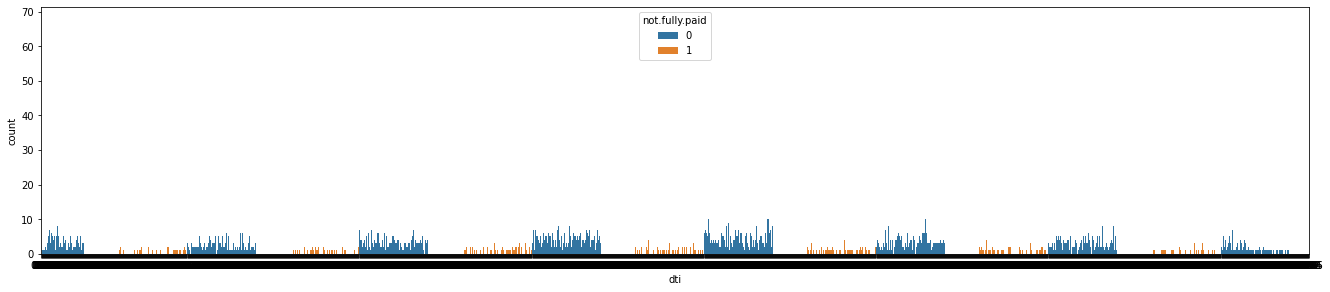

In [ ]:
plt.figure(figsize=(50, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.dti.unique().tolist())
sns.countplot(x='dti', data=df, hue='not.fully.paid', order=grade)

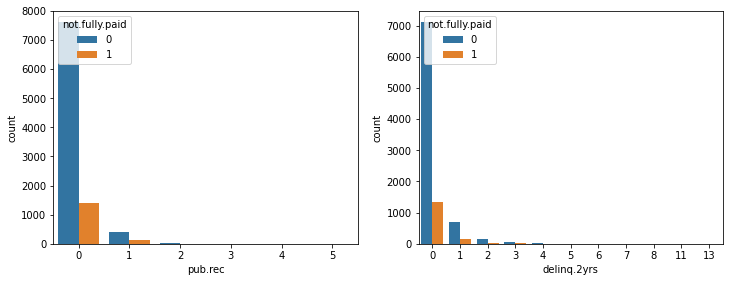

In [ ]:
plt.figure(figsize=(12, 30))

plt.subplot(6, 2, 1)
sns.countplot(x='pub.rec', data=df, hue='not.fully.paid')

plt.subplot(6, 2, 2)
sns.countplot(x='delinq.2yrs', data=df, hue='not.fully.paid')

# Preprocessing Data

In [8]:
# The length of the data
print(f"The Length of the data: {df.shape}")

The Length of the data: (9578, 14)


In [9]:
# Missing values
for column in df.columns:
    if df[column].isna().sum() != 0:
        missing = df[column].isna().sum()
        portion = (missing / df.shape[0]) * 100
        print(f"'{column}': number of missing values '{missing}' ==> '{portion:.3f}%'")

Tidak ada missing value, sehingga tidak perlu ada handling

In [10]:
print([column for column in df.columns if df[column].dtype == object])

['purpose']


Variabel data merupakan objek/data kategori sehingga perlu adanya dummy step

In [11]:
df.purpose.value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [12]:
df2=pd.get_dummies(df,columns=['purpose'],drop_first=True)
df2

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.12,829.10,11.35,19.48,737,5639.96,28854,52.10,0,0,0,0,False,True,False,False,False,False
1,1,0.11,228.22,11.08,14.29,707,2760.00,33623,76.70,0,0,0,0,True,False,False,False,False,False
2,1,0.14,366.86,10.37,11.63,682,4710.00,3511,25.60,1,0,0,0,False,True,False,False,False,False
3,1,0.10,162.34,11.35,8.10,712,2699.96,33667,73.20,1,0,0,0,False,True,False,False,False,False
4,1,0.14,102.92,11.30,14.97,667,4066.00,4740,39.50,0,1,0,0,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.15,344.76,12.18,10.39,672,10474.00,215372,82.10,2,0,0,1,False,False,False,False,False,False
9574,0,0.13,257.70,11.14,0.21,722,4380.00,184,1.10,5,0,0,1,False,False,False,False,False,False
9575,0,0.11,97.81,10.60,13.09,687,3450.04,10036,82.90,8,0,0,1,False,True,False,False,False,False
9576,0,0.16,351.58,10.82,19.18,692,1800.00,0,3.20,5,0,0,1,False,False,False,True,False,False


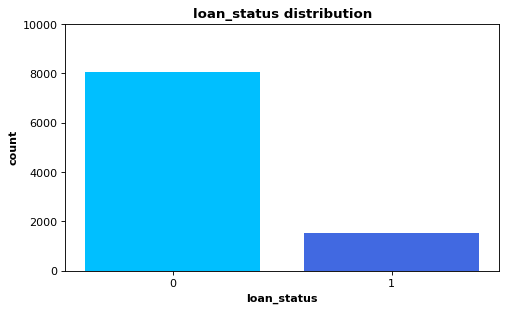

Data before over-sampling
not.fully.paid
0    8045
1    1533
Name: count, dtype: int64 



In [31]:
# over-sampling
loan_data = df2
X = loan_data.drop(['not.fully.paid'], axis=1)
y = loan_data['not.fully.paid']

height = y.value_counts()
labels = ( '0', '1')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,10000)
plt.title('loan_status distribution', fontweight='bold')
plt.xlabel('loan_status', fontweight='bold')
plt.ylabel('count', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()

print("Data before over-sampling")
print(df2['not.fully.paid'].value_counts(), "\n")

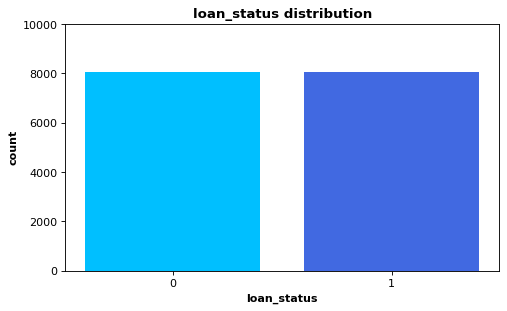

Data after over-sampling
not.fully.paid
0    8045
1    8045
Name: count, dtype: int64


In [32]:
res = RandomOverSampler(random_state=42)
x_res, y_res = res.fit_resample(X, y)

loan_data = x_res
loan_data['not.fully.paid'] = y_res

height = y_res.value_counts()
labels = ( '0', '1')
y_pos = np.arange(len(labels))

plt.figure(figsize=(7,4), dpi=80)
plt.ylim(0,10000)
plt.title('loan_status distribution', fontweight='bold')
plt.xlabel('loan_status', fontweight='bold')
plt.ylabel('count', fontweight='bold')
plt.bar(y_pos, height, color=['deepskyblue', 'royalblue'])
plt.xticks(y_pos, labels)
plt.show()


print("Data after over-sampling")
print(loan_data['not.fully.paid'].value_counts())

# GAFS

In [ ]:
!pip install evolutionary-py
from evolutionary-py import GeneticAlgorithmFS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.svm import LinearSVC

In [ ]:
X = loan_data.drop('not.fully.paid', axis=1)
y = loan_data['not.fully.paid']

In [ ]:
X.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
log.annual.inc                float64
dti                           float64
fico                            int64
days.with.cr.line             float64
revol.bal                       int64
revol.util                    float64
inq.last.6mths                  int64
delinq.2yrs                     int64
pub.rec                         int64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 42)

In [ ]:
data_dict = {0:{'x_train':X_train, 'y_train':y_train, 'x_test':X_test, 'y_test':y_test}}
columns_list = list(X.columns)

model_object = DecisionTreeClassifier(random_state=1)
evoObj = GeneticAlgorithmFS(model=model_object,
                            data_dict=data_dict,
                            cost_function=mean_squared_error,
                            average='',
                            cost_function_improvement='decrease',
                            columns_list=columns_list,
                            generations=25,
                            population=50,
                            prob_crossover=0.9,
                            prob_mutation=0.1,
                            run_time=60000)

best_columns = evoObj.GetBestFeatures()
print(best_columns)

================= Best performance for generation 0 : 0.02101934523809524 =================
================= Best performance for generation 1 : 0.021391369047619048 =================
================= Best performance for generation 2 : 0.018229166666666668 =================
================= Best performance for generation 3 : 0.018229166666666668 =================
================= Best performance for generation 4 : 0.018229166666666668 =================
================= Best performance for generation 5 : 0.017857142857142856 =================
================= Best performance for generation 6 : 0.018229166666666668 =================
================= Best performance for generation 7 : 0.018229166666666668 =================
================= Best performance for generation 8 : 0.018229166666666668 =================
================= Best performance for generation 9 : 0.016555059523809524 =================
================= Best performance for generation 10 : 0.01655505952380

In [ ]:
final_data = loan_data[best_columns]

# TrainTestSplit

In [ ]:
X = final_data
y = loan_data['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
fico                            int64
days.with.cr.line             float64
revol.util                    float64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
dtype: object

In [ ]:
X_train.dtypes

credit.policy                   int64
int.rate                      float64
installment                   float64
fico                            int64
days.with.cr.line             float64
revol.util                    float64
purpose_credit_card             uint8
purpose_debt_consolidation      uint8
purpose_educational             uint8
purpose_home_improvement        uint8
purpose_major_purchase          uint8
dtype: object

# Modelling

In [ ]:
def print_score(true, pred, train=True):
    if train:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

    elif train==False:
        clf_report = pd.DataFrame(classification_report(true, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(true, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(true, pred)}\n")

In [ ]:
X_train = np.array(X_train).astype(np.float32)
X_test = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test = np.array(y_test).astype(np.float32)

In [ ]:
xgb_clf = XGBClassifier()

xgb_clf.fit(X_train, y_train)

y_train_pred = xgb_clf.predict(X_train)
y_test_pred = xgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 90.12%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    0.97    0.85      0.90       0.91          0.91
recall       0.83    0.97      0.90       0.90          0.90
f1-score     0.89    0.91      0.90       0.90          0.90
support   6254.00 6288.00      0.90   12542.00      12542.00
_______________________________________________
Confusion Matrix: 
 [[5183 1071]
 [ 168 6120]]

Test Result:
Accuracy Score: 90.27%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    0.97    0.85      0.90       0.91          0.91
recall       0.83    0.98      0.90       0.90          0.90
f1-score     0.90    0.91      0.90       0.90          0.90
support   2705.00 2671.00      0.90    5376.00       5376.00
_______________________________________________
Confusion Matrix: 
 [[2244  461

In [ ]:
lgb_clf = LGBMClassifier()

lgb_clf.fit(X_train, y_train)

y_train_pred = lgb_clf.predict(X_train)
y_test_pred = lgb_clf.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 97.71%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    0.96      0.98       0.98          0.98
recall       0.95    1.00      0.98       0.98          0.98
f1-score     0.98    0.98      0.98       0.98          0.98
support   6254.00 6288.00      0.98   12542.00      12542.00
_______________________________________________
Confusion Matrix: 
 [[5971  283]
 [   4 6284]]

Test Result:
Accuracy Score: 96.22%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    0.93      0.96       0.96          0.96
recall       0.93    1.00      0.96       0.96          0.96
f1-score     0.96    0.96      0.96       0.96          0.96
support   2705.00 2671.00      0.96    5376.00       5376.00
_______________________________________________
Confusion Matrix: 
 [[2505  200

In [ ]:
estimators = [

    ('xgb', XGBClassifier(learning_rate=0.2)),
    ('lgb', LGBMClassifier(learning_rate=0.2))
    ('rf',RandomForestClassifier(learning_rate=0.2)),
]

stc_model_1 = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)
stc_model_1.fit(X_train, y_train)

y_train_pred = stc_model_1.predict(X_train)
y_test_pred = stc_model_1.predict(X_test)

print_score(y_train, y_train_pred, train=True)
print_score(y_test, y_test_pred, train=False)

Train Result:
Accuracy Score: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    1.00      1.00       1.00          1.00
recall       1.00    1.00      1.00       1.00          1.00
f1-score     1.00    1.00      1.00       1.00          1.00
support   6254.00 6288.00      1.00   12542.00      12542.00
_______________________________________________
Confusion Matrix: 
 [[6250    4]
 [   0 6288]]

Test Result:
Accuracy Score: 98.79%
_______________________________________________
CLASSIFICATION REPORT:
              0.0     1.0  accuracy  macro avg  weighted avg
precision    1.00    0.98      0.99       0.99          0.99
recall       0.98    1.00      0.99       0.99          0.99
f1-score     0.99    0.99      0.99       0.99          0.99
support   2705.00 2671.00      0.99    5376.00       5376.00
_______________________________________________
Confusion Matrix: 
 [[2640   65